In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Features seletcion
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# Train/test split
from sklearn.model_selection import train_test_split

# Models Supervised Learning
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest

# Models Unsupervised Learning
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


# Standard Scaller
from sklearn.preprocessing import StandardScaler

# Hyperparameters Tunning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Models evaluation
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, auc, RocCurveDisplay
from sklearn.metrics import f1_score, classification_report

from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_mutual_info_score, completeness_score, homogeneity_score, adjusted_rand_score, fowlkes_mallows_score

# TPOT
import tpot
from tpot import TPOTClassifier

# Yellowbirck
from yellowbrick.cluster import KElbowVisualizer

#TPOT results:
from tpot.builtins import StackingEstimator
from sklearn.pipeline import make_pipeline, make_union
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

C:\Users\radek\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


For Machine Learning Part of the project :
I will test models:
- Logistic Regresion,
- Random forest Classifier. 
- Balanced Random Frest Classifier (since my 3 classes are really not ballanced).

Then I will apply tpot to see if there is another model/pipeline to be proposed.

In [2]:
paris_ml = pd.read_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\06 - ML\paris_ready_for_ml.csv')

In [3]:
paris_ml.head()

,temp,humidity,precip,windspeed,pressure,cloudcover,visibility,uvindex,pm25,pm10,o3,no2,Clear,Partially cloudy,Rain,Snow,Overcast,month,day_of_week,target
0,8.4,85.06,1.82,28.9,1006.1,26.7,24.8,0.0,43.0,30.0,22.0,42.0,0,1,1,0,0,1,2,0
1,9.9,81.63,4.96,29.2,1001.7,19.7,24.3,0.0,53.0,33.0,22.0,34.0,0,0,1,0,0,1,3,1
2,11.0,76.53,0.14,29.2,1006.0,20.1,20.4,0.0,50.0,28.0,23.0,41.0,0,1,1,0,0,1,4,0
3,9.1,80.53,0.67,21.5,1001.5,22.2,21.6,0.0,52.0,23.0,19.0,34.0,0,1,1,0,0,1,5,1
4,6.9,82.81,1.25,22.8,1007.5,22.8,24.0,0.0,45.0,20.0,20.0,30.0,0,1,1,0,0,1,6,0


In [4]:
paris_ml.shape

(2922, 20)

In [5]:
# I can drop columns with the pollutants as I want for the model to indirectly predict them
paris_ml.drop(columns=['pm25', 'pm10', 'o3', 'no2'], inplace=True)

In [6]:
paris_ml.shape

(2922, 16)

#### Separation of data into X and y 

In [7]:
X = paris_ml.drop(columns='target')
y =paris_ml['target']

In [8]:
# I will standarize the data as I am planning on using the Logistic Regression as well
sc = StandardScaler()
X_stand = sc.fit_transform(X)

In [9]:
X.head()

,temp,humidity,precip,windspeed,pressure,cloudcover,visibility,uvindex,Clear,Partially cloudy,Rain,Snow,Overcast,month,day_of_week
0,8.4,85.06,1.82,28.9,1006.1,26.7,24.8,0.0,0,1,1,0,0,1,2
1,9.9,81.63,4.96,29.2,1001.7,19.7,24.3,0.0,0,0,1,0,0,1,3
2,11.0,76.53,0.14,29.2,1006.0,20.1,20.4,0.0,0,1,1,0,0,1,4
3,9.1,80.53,0.67,21.5,1001.5,22.2,21.6,0.0,0,1,1,0,0,1,5
4,6.9,82.81,1.25,22.8,1007.5,22.8,24.0,0.0,0,1,1,0,0,1,6


## Features selection

### Select From Model

In [10]:
# With RFC
SFM = SelectFromModel(estimator=RandomForestClassifier())
s=SFM.fit(X, y)


#Results
n_features = s.transform(X).shape[1]
print(f'Number of features: {n_features}')
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
print(f'Features selected:\n{feature_name}') 

Number of features: 7
Features selected:
Index(['temp', 'humidity', 'windspeed', 'pressure', 'cloudcover', 'visibility',
       'uvindex'],
      dtype='object')


In [11]:
# With BRFC
SFM = SelectFromModel(estimator=BalancedRandomForestClassifier())
s=SFM.fit(X, y)


#Results
n_features = s.transform(X).shape[1]
print(f'Number of features: {n_features}')
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
print(f'Features selected:\n{feature_name}') 

Number of features: 7
Features selected:
Index(['temp', 'humidity', 'windspeed', 'pressure', 'cloudcover', 'visibility',
       'uvindex'],
      dtype='object')


In [12]:
# With LR - Logistic Regression
SFM = SelectFromModel(estimator=LogisticRegression())
s=SFM.fit(X_stand, y)


#Results
n_features = s.transform(X_stand).shape[1]
print(f'Number of features: {n_features}')
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
print(f'Features selected:\n{feature_name}') 

Number of features: 4
Features selected:
Index(['humidity', 'windspeed', 'visibility', 'uvindex'], dtype='object')


RFE - Recursive Feature Elimination

In [13]:
rfe_selector = RFE(estimator=RandomForestClassifier())
m=rfe_selector.fit(X, y)
X.columns[m.get_support()]
print("Num Features: %s" % (m.n_features_))
print("Selected Features: %s" % (m.support_))
print("Feature Ranking: %s" % (m.ranking_))

Num Features: 7
Selected Features: [ True  True False  True  True  True  True  True False False False False
 False False False]
Feature Ranking: [1 1 2 1 1 1 1 1 6 7 5 8 9 3 4]


RFECV

In [14]:
rfecv = RFECV(
    estimator=RandomForestClassifier(),
    min_features_to_select=2,
    step=1,
    n_jobs=-1,
    verbose=1,
    scoring="r2",
    cv=5,
)

m= rfecv.fit(X, y)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.


C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


In [15]:
features_selected = X.columns[rfecv.support_]
features_selected

Index(['temp', 'humidity', 'precip', 'windspeed', 'pressure', 'cloudcover',
       'visibility', 'uvindex'],
      dtype='object')

In [16]:
# All of the features selectors suggest to work 7-8 columns alll of them greatly dependent on the weather. I will try two variants: 
# First with all of the columns.
# Second with just the columns proposed by the feature selection.

### Train test split

Data

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2337, 15)
(2337,)
(585, 15)
(585,)


Standarized data

In [18]:
x_train_st, x_test_st, y_train, y_test = train_test_split(X_stand, y, test_size=0.2, random_state=5)
print(x_train_st.shape)
print(y_train.shape)
print(x_test_st.shape)
print(y_test.shape)

(2337, 15)
(2337,)
(585, 15)
(585,)


Function to evaluate models

In [44]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    print("\nBalanced accuracy_score ", balanced_accuracy_score(y_test,predictions))
    print("\nF1_score ",f1_score(y_test,predictions, average='weighted'))
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'YlGn', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

### Hyperparameter Tunning 

Logistic Regression

In [20]:
grid_search = GridSearchCV(LogisticRegression(),
                           {
                              'max_iter': np.arange(100,400,50),
                              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                              'multi_class': ['auto', 'ovr', 'multinomial']
                            },cv=3, scoring="balanced_accuracy",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_stand,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
{'max_iter': 100, 'multi_class': 'auto', 'solver': 'sag'}
0.7064587128581192


C:\Users\radek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\radek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\radek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1519, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
  File "C:\Users\radek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 483, in _check_multi_class
  

Random Forest Classifier

In [21]:
rand_search = RandomizedSearchCV(RandomForestClassifier(),
                           {'bootstrap': [True, False],
                            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                            'max_features': ['auto', 'sqrt'],
                            'min_samples_leaf': [1, 2, 4],
                            'min_samples_split': [2, 5, 10],
                            'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
                            cv=5, scoring="balanced_accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(X,y)
print(rand_search.best_params_)
print(rand_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False}
0.6792575139273838


Balanced random Forest Classifier

In [22]:
rand_search = RandomizedSearchCV(BalancedRandomForestClassifier(),
                           {'bootstrap': [True, False],
                            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                            'max_features': ['auto', 'sqrt'],
                            'min_samples_leaf': [1, 2, 4],
                            'min_samples_split': [2, 5, 10],
                            'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
                            cv=5, scoring="balanced_accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(X,y)
print(rand_search.best_params_)
print(rand_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False}
0.7733714775389037


## Models

### Logistic Regression

The accuracy of the Logistic Regression is: 76.23931623931624 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.75      0.56      0.64       181
           1       0.76      0.89      0.82       354
           2       0.85      0.58      0.69        50

    accuracy                           0.76       585
   macro avg       0.79      0.68      0.72       585
weighted avg       0.76      0.76      0.75       585


Balanced accuracy_score  0.6768888056517984

F1_score  0.7534575027700838


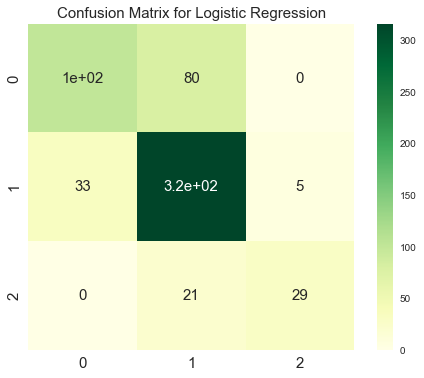

In [45]:
lr = LogisticRegression()
lr.fit(x_train_st, y_train)


# Results
y_pred = lr.predict(x_test_st)
# Predict probabilities
probs_y=lr.predict_proba(x_test_st)
### Print results 
probs_y = np.round(probs_y, 2)

print('The accuracy of the Logistic Regression is:', lr.score(x_test_st, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')

### Random Forest Classifier

The accuracy of the Random Forest Classifier is: 77.26495726495727 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.81      0.60      0.69       181
           1       0.76      0.91      0.83       354
           2       0.79      0.44      0.56        50

    accuracy                           0.77       585
   macro avg       0.78      0.65      0.69       585
weighted avg       0.78      0.77      0.76       585


Balanced accuracy_score  0.6487632008823131

F1_score  0.7619227680766143


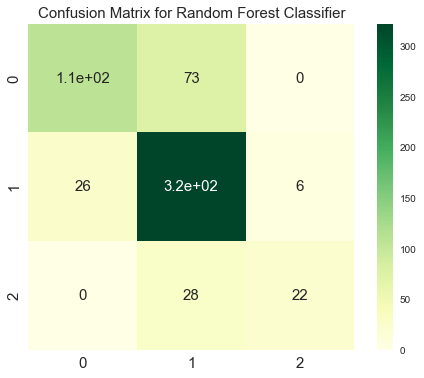

In [46]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

### Balanced random Forest Classifier

The accuracy of the Balanced Random Forest Classifier is: 68.88888888888889 %

The classification report for Balanced Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       181
           1       0.81      0.63      0.71       354
           2       0.49      0.88      0.63        50

    accuracy                           0.69       585
   macro avg       0.64      0.75      0.67       585
weighted avg       0.72      0.69      0.69       585


Balanced accuracy_score  0.7537749060981573

F1_score  0.6928271392003686


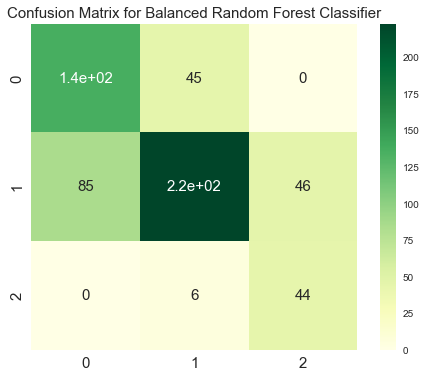

In [47]:
brfc = BalancedRandomForestClassifier()
brfc.fit(x_train, y_train)
y_pred = brfc.predict(x_test)
acc_brfc = brfc.score(x_test, y_test)
print('The accuracy of the Balanced Random Forest Classifier is:', acc_brfc * 100, '%')
generate_results(brfc, y_pred, 'Balanced Random Forest Classifier')

n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False

The accuracy of the Balanced Random Forest Classifier is: 71.7948717948718 %

The classification report for Balanced Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.64      0.81      0.71       181
           1       0.85      0.65      0.74       354
           2       0.51      0.90      0.65        50

    accuracy                           0.72       585
   macro avg       0.67      0.78      0.70       585
weighted avg       0.76      0.72      0.72       585


Balanced accuracy_score  0.7845074965404585

F1_score  0.7214960175693458


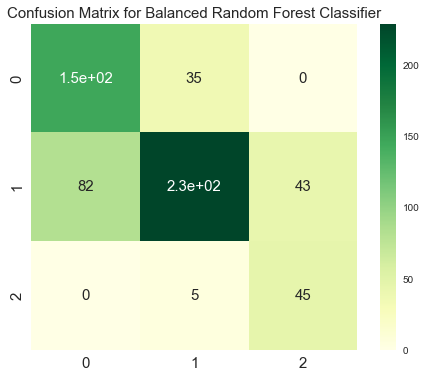

In [50]:
brfc = BalancedRandomForestClassifier(n_estimators=1400,min_samples_split=2, min_samples_leaf=2, max_features='auto', max_depth=30, bootstrap=False)
brfc.fit(x_train, y_train)
y_pred = brfc.predict(x_test)
acc_brfc = brfc.score(x_test, y_test)
print('The accuracy of the Balanced Random Forest Classifier is:', acc_brfc * 100, '%')
generate_results(brfc, y_pred, 'Balanced Random Forest Classifier')

### TPOT

In [27]:
model = TPOTClassifier(generations=5, population_size=50, cv=5, scoring='balanced_accuracy', verbosity=3, n_jobs=-1)

In [28]:
# model.fit(x_train, y_train)

In [29]:
# model.export(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\06 - ML\tpot_model.py')

AttributeError: 'TPOTClassifier' object has no attribute '_optimized_pipeline'

In [31]:
features = paris_ml.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, paris_ml['target'], random_state=None)

# Average CV score on the training set was: 0.7987671078415679
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.6000000000000001, min_samples_leaf=4, min_samples_split=14, n_estimators=100)),
    GaussianNB()
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [35]:
acc_tpot = exported_pipeline.score(testing_features, testing_target)
print('The accuracy of the Stacking Estimator is:', acc_tpot * 100, '%')

The accuracy of the Stacking Estimator is: 69.63064295485636 %


C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [49]:
print(confusion_matrix(testing_target,results))
print(balanced_accuracy_score(testing_target,results))
print(f1_score(testing_target,results, average='weighted'))


[[196  32   0]
 [134 275  45]
 [  1  10  38]]
0.7469620663784488
0.7003594272196342


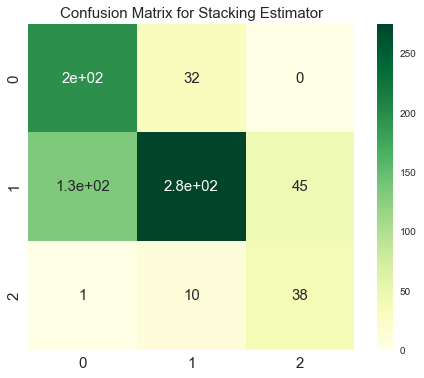

In [41]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(testing_target,results), annot = True, cmap = 'YlGn', annot_kws = {'size': 15}, square = True)
plt.title('Confusion Matrix for Stacking Estimator', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show() 

In [ ]:
print(classification_report(testing_target,results))

              precision    recall  f1-score   support

           0       0.51      0.93      0.66       200
           1       0.90      0.54      0.67       474
           2       0.54      0.77      0.63        57

    accuracy                           0.66       731
   macro avg       0.65      0.75      0.65       731
weighted avg       0.77      0.66      0.67       731



### New features selection only for Balanced Forest Classifier and TPOT proposed pipeline

In [ ]:
# New features (proposed by RFECV)
X_new = X[features_selected]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2337, 8)
(2337,)
(585, 8)
(585,)


Balanced Random Forest Classifier

The accuracy of the Random Forest Classifier is: 71.28205128205128 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.64      0.78      0.70       181
           1       0.84      0.65      0.73       354
           2       0.51      0.90      0.65        50

    accuracy                           0.71       585
   macro avg       0.66      0.78      0.70       585
weighted avg       0.75      0.71      0.72       585



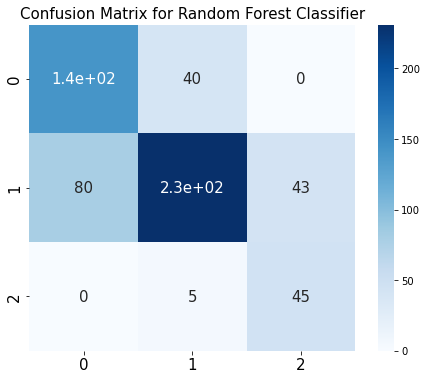

In [ ]:
brfc = BalancedRandomForestClassifier()
brfc.fit(x_train, y_train)
y_pred = brfc.predict(x_test)
acc_brfc = brfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_brfc * 100, '%')
generate_results(brfc, y_pred, 'Random Forest Classifier')

Pipline Proposed by TPOT

In [ ]:
features = X_new
training_features, testing_features, training_target, testing_target = \
            train_test_split(features,y, random_state=None)

# Average CV score on the training set was: 0.7987671078415679
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.6000000000000001, min_samples_leaf=4, min_samples_split=14, n_estimators=100)),
    GaussianNB()
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(accuracy_score(testing_target,results))
print(confusion_matrix(testing_target,results))
print(balanced_accuracy_score(testing_target,results))
print(f1_score(testing_target,results, average='weighted'))

0.7414500683994528
[[125  68   0]
 [ 73 371  33]
 [  0  15  46]]
0.7265148440719663
0.7437108924027401


In [ ]:
print(classification_report(testing_target,results))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       193
           1       0.82      0.78      0.80       477
           2       0.58      0.75      0.66        61

    accuracy                           0.74       731
   macro avg       0.68      0.73      0.70       731
weighted avg       0.75      0.74      0.74       731



### Isolation Forest Model

C:\Users\radek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radek\anaconda3\lib\site-packages\sklearn\metrics\_cla


The classification report for Isolation Forest Classifier is:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       181
           1       0.61      0.90      0.73       354
           2       0.00      0.00      0.00        50

    accuracy                           0.55       585
   macro avg       0.15      0.23      0.18       585
weighted avg       0.37      0.55      0.44       585



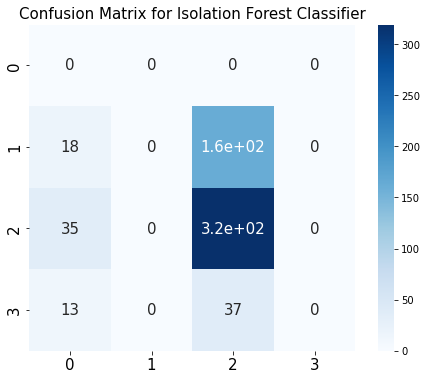

In [ ]:
iso_for =  IsolationForest()
iso_for.fit(x_train, y_train)
y_pred = iso_for.predict(x_test)
# acc_iso_for = iso_for.score(x_test, y_test)
# print('The accuracy of the Isolation Forest Classifier is:', acc_iso_for * 100, '%')
generate_results(iso_for, y_pred, 'Isolation Forest Classifier')

## Unsupervised Learning

In [ ]:
def unsupervised_metrics(X, y_true, y_pred):
	print("Silhouette Coefficient is equal to:", (silhouette_score(X,y_pred)))
	print("Variance Ratio Crterion is equal to:", (calinski_harabasz_score(X, y_pred)))
	print("Adjusted mutual Information is equal to:", (adjusted_mutual_info_score(y_true,y_pred)))
	print("Completeness is equal to:", (completeness_score(y_true,y_pred)))
	print("Homogeneity is equal to:", (homogeneity_score(y_true,y_pred)))
	print("Adjusted Rand Index is equal to:", (adjusted_rand_score(y_true,y_pred)))
	print("Fowlkes Mallow Scorex is equal to:",(fowlkes_mallows_score(y_true,y_pred)))

Data

In [ ]:
data_uml = paris_ml.drop(columns='target')

In [ ]:
data_uml.head()

,temp,humidity,precip,windspeed,pressure,cloudcover,visibility,uvindex,Clear,Partially cloudy,Rain,Snow,Overcast,month,day_of_week
0,8.4,85.06,1.82,28.9,1006.1,26.7,24.8,0.0,0,1,1,0,0,1,2
1,9.9,81.63,4.96,29.2,1001.7,19.7,24.3,0.0,0,0,1,0,0,1,3
2,11.0,76.53,0.14,29.2,1006.0,20.1,20.4,0.0,0,1,1,0,0,1,4
3,9.1,80.53,0.67,21.5,1001.5,22.2,21.6,0.0,0,1,1,0,0,1,5
4,6.9,82.81,1.25,22.8,1007.5,22.8,24.0,0.0,0,1,1,0,0,1,6


### Elbow method

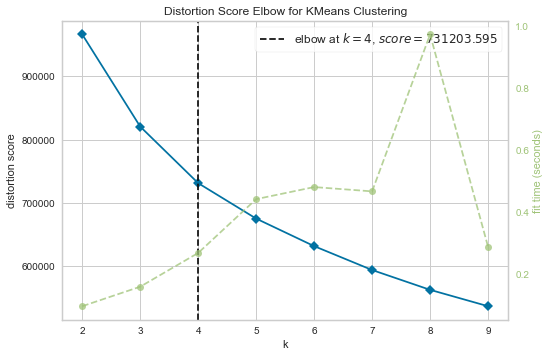

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(data_uml)
visualizer.poof()

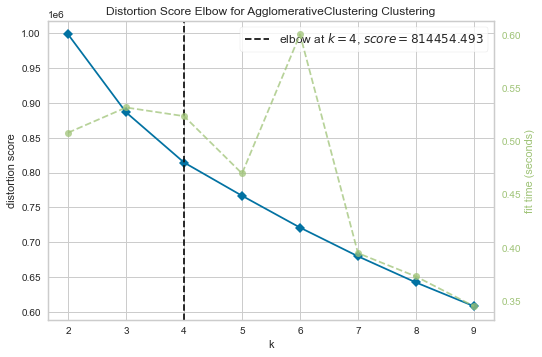

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(data_uml)
visualizer.poof()

### Models

#### KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(data_uml)
y_kmeans = kmeans.predict(data_uml)
y_kmeans = pd.DataFrame(y_kmeans)


In [ ]:
unsupervised_metrics(X=data_uml, y_true=paris_ml.target, y_pred=y_kmeans)

Silhouette Coefficient is equal to: 0.24183967107811882
Variance Ratio Crterion is equal to: 1145.4038410412409
Adjusted mutual Information is equal to: 0.05120486715521
Completeness is equal to: 0.045703791473506436
Homogeneity is equal to: 0.05999347129540566
Adjusted Rand Index is equal to: 0.032225216800497475
Fowlkes Mallow Scorex is equal to: 0.431097297864788


In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=100)
kmeans.fit(data_uml)
y_kmeans = kmeans.predict(data_uml)
y_kmeans
unsupervised_metrics(X=data_uml, y_true=paris_ml.target, y_pred=y_kmeans)


Silhouette Coefficient is equal to: 0.19245925256627774
Variance Ratio Crterion is equal to: 975.7080589817449
Adjusted mutual Information is equal to: 0.07164618435972983
Completeness is equal to: 0.05807829435698526
Homogeneity is equal to: 0.09648933688924692
Adjusted Rand Index is equal to: 0.03227167181753269
Fowlkes Mallow Scorex is equal to: 0.3783166749836848


In [ ]:
# sns.set_style('darkgrid')
# sns.scatterplot(data=data_uml, x='temp', y='Lat', hue='labels_kmeans', palette='RdYlBu')
# plt.show()

In [ ]:
y_kmeans.value_counts()

2    1158
0     883
1     881
dtype: int64

#### Agglomerative Clustering

In [ ]:
cluster_ag = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_ag = cluster_ag.fit_predict(data_uml)

In [ ]:
unsupervised_metrics(X=data_uml, y_true=paris_ml.target, y_pred=y_ag)

Silhouette Coefficient is equal to: 0.1106143869386786
Variance Ratio Crterion is equal to: 601.7619066776825
Adjusted mutual Information is equal to: 0.039639554793656016
Completeness is equal to: 0.030874402372098878
Homogeneity is equal to: 0.06096340289135434
Adjusted Rand Index is equal to: 0.010223913342330604
Fowlkes Mallow Scorex is equal to: 0.3260930848557058


DBSCAN

In [ ]:
dbscan = DBSCAN()
dbscan.fit(data_uml)
y_dbscan = dbscan.fit_predict(data_uml)
set(y_dbscan)


{-1}

In [ ]:
unsupervised_metrics(X=data_uml, y_true=paris_ml.target, y_pred=y_dbscan)